In [101]:
# FieldNBalance is a program that estimates the N balance and provides N fertilizer recommendations for cultivated crops.
# Author: Hamish Brown.
# Copyright (c) 2024 The New Zealand Institute for Plant and Food Research Limited

In [102]:
import os 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

CBcolors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

Path for current Tests

In [103]:
try: 
    if os.environ["GITHUB_WORKSPACE"] != None:
        root = os.environ["GITHUB_WORKSPACE"]
        inPath = os.path.join(root, "TestComponents", "TestSets", "Losses", "Outputs")
        outPath = os.path.join(root, "TestGraphs", "Outputs")  
except:
    rootfrags = os.path.abspath('Losses.py').split("\\")
    root = ""
    for d in rootfrags:
        if d == "FieldNBalance":
            break
        else:
            root += d + "\\"
    inPath = os.path.join(root,"FieldNBalance","TestComponents", "TestSets", "Losses", "Outputs")
    outPath = os.path.join(root,"FieldNBalance","TestGraphs", "Outputs")  

Get names and results from each test

In [104]:
testFiles = []
tests = []
for file in os.listdir(inPath):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

Pack tests up into dataframe for graphing

In [105]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(os.path.join(inPath, t),index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

In [139]:
Treats = ["Base","LowYield","Rocks","VeryDry","VeryWet"]
cols = ['k','orange','purple','red','blue']

Make graph

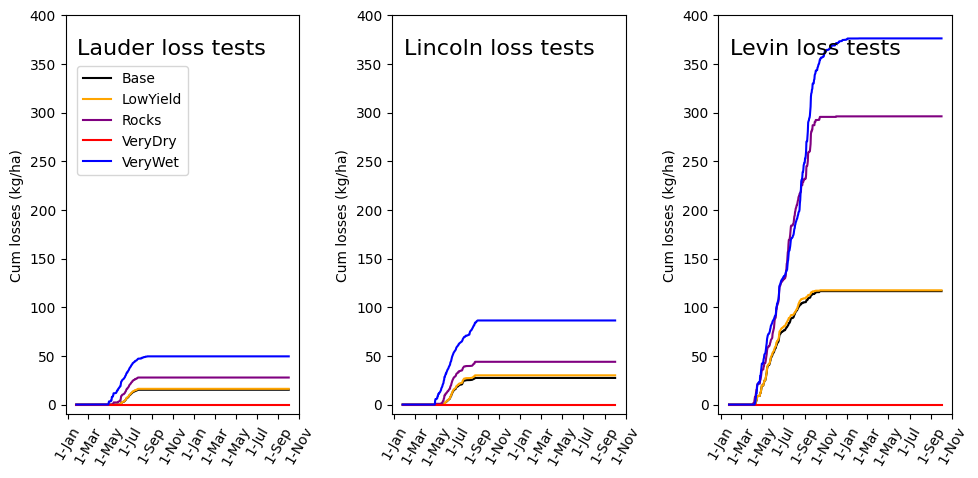

In [145]:
Graph = plt.figure(figsize=(10,5))
pos=1
for site in ['Lauder','Lincoln','Levin']:
    ax = Graph.add_subplot(1,3,pos)
    tpos=0
    for t in Treats:
        data = AllData.loc[:,[(site in x) and (t in x) for x in AllData.columns.get_level_values(0)]]
        plt.plot(data.loc[:,['LostN' in x for x in data.columns.get_level_values(1)]].cumsum(),color=cols[tpos],label = t)
        tpos+=1
    if site=="Lauder":
        plt.legend(loc=(.05,0.6))
    plt.ylabel('Cum losses (kg/ha)')
    plt.text(0.05,0.9,site + " loss tests",fontsize = 16,transform=ax.transAxes)
    plt.ylim(-10,400)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
    plt.xticks(rotation=60)
    pos+=1
Graph.tight_layout(pad=1.5)             
plt.savefig(os.path.join(outPath,'Losses.png'))       